In [81]:
import pandas as pd
import numpy as np

In [82]:
df = pd.read_csv("db/global-superstore-orders.csv")

In [83]:
# cross tab of customers and products with counts
pd.crosstab(df['Customer Name'], df['Product Name'], df["Quantity"], aggfunc=pd.Series.nunique)

Product Name,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Customer Name,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Hawkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Smayling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Bellavance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam Hart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xylona Preis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yana Sorensen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yoseph Carroll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
from fastai.collab import CollabDataLoaders

# group by unique Customer ID and unique Product ID



customer_purchases = df.groupby(['Customer ID', 'Product Name']).agg({'Quantity': 'sum'}).reset_index()
customer_purchases.rename(columns={
    'Quantity': 'rating',
    'Customer ID': 'user',
    'Product Name': 'item',
}, inplace=True)

customer_purchases['rating'] = 1

display(customer_purchases['rating'].max())

1

In [85]:
customer_purchases.head()

,user,item,rating
0,AA-10315,"Acco Banker's Clasps, 5 3/4""-Long",1
1,AA-10315,"Advantus Stacking Tray, Erganomic",1
2,AA-10315,"Apple Speaker Phone, with Caller ID",1
3,AA-10315,Avery Binding System Hidden Tab Executive Style Index Sets,1
4,AA-10315,"Avery Index Tab, Economy",1


In [86]:
# split data into training and validation sets using sklearn
#from sklearn.model_selection import train_test_split

#train, valid = train_test_split(customer_purchases, test_size=0.2, random_state=42)

In [87]:
# this function requires a user, item, and rating column
dls = CollabDataLoaders.from_df(customer_purchases, bs=64)
dls.show_batch()

,user,item,rating
0,CS-12250,"DAX Two-Tone Rosewood/Black Document Frame, Desktop, 5 x 7",1
1,CC-12370,"Eaton Message Books, Multicolor",1
2,BT-11530,Desktop 3-Pocket Hot File,1
3,BF-975,"Binney & Smith Canvas, Water Color",1
4,PO-19180,Hoover Shoulder Vac Commercial Portable Vacuum,1
5,TS-11610,"Smead Lockers, Blue",1
6,BD-11320,"Hoover Microwave, Red",1
7,MW-18220,"Cardinal Binding Machine, Economy",1
8,JL-15835,"Harbour Creations File Folder Labels, Alphabetical",1
9,JL-15505,"SanDisk Parchment Paper, Multicolor",1


In [88]:
import torch

n_users = len(dls.classes['user'])
n_items = len(dls.classes['item'])

# create 5 random factors for each user and movie
# factors are the latent features that we are trying to learn
n_factors = 5
user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_items, n_factors)

display(n_users)
display(n_items)

1591

3789

In [104]:
from fastai.collab import collab_learner

 # y_range is the range of the ratings, our maximum is 1
learn = collab_learner(dls, n_factors=20, y_range=(0,1.1))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

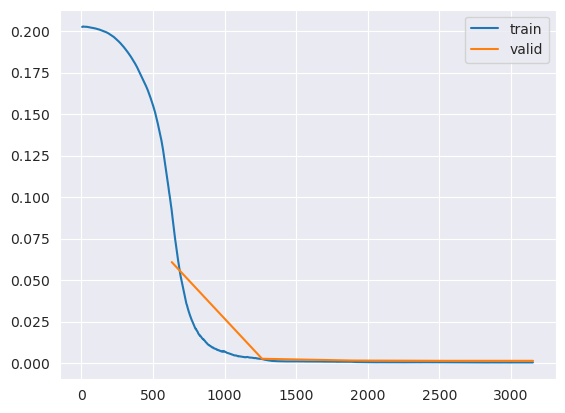

In [102]:
learn.recorder.plot_loss()

In [91]:


# get predictions for the validation set
#preds = learn.get_preds(dl=dls)


# Making Recommendations

In [92]:
# choose a test user
test_user = df['Customer ID'].unique()[1000]
# what products did this user buy in the past?
past_purchases = df[df['Customer ID'] == test_user].groupby(['Product Name', 'Sub-Category']).agg({'Quantity': 'sum'}).reset_index().sort_values('Quantity', ascending=False)
print(f"test_user: {test_user}")
display(past_purchases)

test_user: DB-13360


,Product Name,Sub-Category,Quantity
5,"Cameo Clasp Envelope, Security-Tint",Envelopes,13
39,Universal Premium White Copier/Laser Paper (20Lb. and 87 Bright),Paper,9
32,"SanDisk Note Cards, Multicolor",Paper,9
36,"Stockwell Clamps, 12 Pack",Fasteners,8
31,"SAFCO Steel Folding Chair, Set of Two",Chairs,8
33,"Sanford Pencil Sharpener, Fluorescent",Art,8
41,"Wilson Jones Index Tab, Recycled",Binders,7
6,Cardinal EasyOpen D-Ring Binders,Binders,7
19,"Hon Bag Chairs, Black",Chairs,7
12,"Eldon Shelving, Blue",Storage,7


In [93]:
# what products did this user not buy in the past?
# we will use this list to make recommendations
products_not_purchased = df[~df['Product Name'].isin(past_purchases['Product Name'])]['Product Name'].unique()
print(f"products_not_purchased: {len(products_not_purchased)}")

products_not_purchased: 3745


In [115]:
test_df = pd.DataFrame({
    'user': [test_user] * len(products_not_purchased),
    'item': products_not_purchased
})

dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=dl)

# merge predictions with product names
preds_df = pd.DataFrame({
    'item': products_not_purchased,
    'prediction': preds[0].numpy().flatten()
}).sort_values('prediction', ascending=False)
display(preds_df[:50])

,item,prediction
2659,"Acco Index Tab, Clear",0.652369
322,"Tenex File Cart, Single Width",0.649585
1444,"Stanley Pencil Sharpener, Water Color",0.648415
1425,Staples,0.648158
2729,"Ibico Index Tab, Clear",0.646970
1553,"Sanford Pencil Sharpener, Water Color",0.646724
383,"Rogers File Cart, Single Width",0.646444
873,"BIC Pencil Sharpener, Water Color",0.645429
237,"Eldon File Cart, Single Width",0.643006
3066,"Wilson Jones Hole Reinforcements, Recycled",0.642786


# Evaluate results using MAP@k

In [95]:
def map_at_k_for_user(test_user, k, all_products, print_info=True):
    test_df = pd.DataFrame({
        'user': [test_user] * len(all_products),
        'item': all_products
    })

    dl = learn.dls.test_dl(test_df)
    preds = learn.get_preds(dl=dl)

    # merge predictions with product names
    preds_df = pd.DataFrame({
        'item': all_products,
        'prediction': preds[0].numpy().flatten()
    }).sort_values('prediction', ascending=False)


    top_k = preds_df[:k]['item'].values
    if print_info:
        print(' =============== TOP k PREDICTIONS ===============')
        display(preds_df[:k].values)

    # next, we need to get the items that were purchased in the past
    past_purchases = df[df['Customer ID'] == test_user]['Product Name'].values

    # find ratings of past purchases
    if print_info:
        past_ratings = preds_df[preds_df['item'].isin(past_purchases)].values
        print(' =============== HOW PAST PURCHASES ARE RANKED ===============')
        display(past_ratings)

    # now we can calculate map@k
    # if the item was purchased in the past, we add 1/k to the sum
    # if the item was not purchased in the past, we add 0 to the sum
    # we divide the sum by the number of items purchased in the past
    # this gives us the mean average precision at k
    map_at_k = 0
    for i, item in enumerate(top_k):
        if item in past_purchases:
            map_at_k += 1 / (i + 1)
    map_at_k /= len(past_purchases)

    if print_info:
        print(f"map@{k}: {map_at_k}")

    return map_at_k

## Test one user

In [96]:
test_user_nr = 1000
test_user = df['Customer ID'].unique()[test_user_nr]
map_at_k_for_user(test_user, 20, df['Product Name'].unique(), print_info=True)

 =============== TOP k PREDICTIONS ===============


array([['Fellowes Trays, Wire Frame', 1.0098410844802856],
       ['Binney & Smith Sketch Pad, Blue', 1.0095986127853394],
       ['Cardinal Binding Machine, Recycled', 1.0093480348587036],
       ['BIC Pencil Sharpener, Water Color', 1.0092010498046875],
       ['Rubbermaid Stacking Tray, Black', 1.0082628726959229],
       ['Sanford Canvas, Blue', 1.0081992149353027],
       ['Fellowes Lockers, Single Width', 1.0077468156814575],
       ['Stanley Highlighters, Water Color', 1.007742166519165],
       ['Samsung Signal Booster, Cordless', 1.0071349143981934],
       ['Rogers Lockers, Industrial', 1.0067684650421143],
       ['Stanley Sketch Pad, Easy-Erase', 1.0066484212875366],
       ['Acco 3-Hole Punch, Clear', 1.006528615951538],
       ['Acco Index Tab, Clear', 1.0062086582183838],
       ['Sanford Pencil Sharpener, Water Color', 1.006174921989441],
       ['Stanley Markers, Fluorescent', 1.0061743259429932],
       ['Fellowes Folders, Single Width', 1.0059391260147095],
       ['

 =============== HOW PAST PURCHASES ARE RANKED ===============


array([['Stanley Canvas, Easy-Erase', 1.004900574684143],
       ['Jiffy Business Envelopes, Recycled', 1.004697322845459],
       ['Eldon Folders, Wire Frame', 1.004256248474121],
       ['Logitech Keyboard, Programmable', 1.002485990524292],
       ['Sanford Pencil Sharpener, Fluorescent', 1.0015909671783447],
       ['Dania Library with Doors, Traditional', 1.0008496046066284],
       ['Cisco Speaker Phone, VoIP', 1.0004076957702637],
       ['Tenex Shelving, Single Width', 0.9998464584350586],
       ['Tenex Stacking Tray, Erganomic', 0.9994844198226929],
       ['Advantus Light Bulb, Durable', 0.9994083642959595],
       ['Wilson Jones 3-Hole Punch, Durable', 0.9989686012268066],
       ['Eldon Shelving, Blue', 0.9981623291969299],
       ['Elite Ruler, Easy Grip', 0.9977415204048157],
       ['Stockwell Clamps, 12 Pack', 0.997631847858429],
       ['Rogers Lockers, Wire Frame', 0.9976141452789307],
       ['Stanley Pens, Blue', 0.9964901804924011],
       ['SanDisk Note Cards, Mu

map@20: 0.0


0.0

## test on all users and calculate the mean

In [97]:

results = []

map_at_k = []
all_products = df['Product Name'].unique()
test_users = df['Customer ID'].unique()#[:200]
# for k in range(20, 30, 5):

k = 20
print('MAP@k for k =', k)
map_at_k = []
for test_user in test_users:
    map_at_k.append(map_at_k_for_user(test_user, k, all_products, print_info=False))
results.append((k, np.mean(map_at_k)))

display(results)

MAP@k for k = 20


MAP@k for k = 25


[(20, 0.007177320970704515), (25, 0.007499714114943785)]

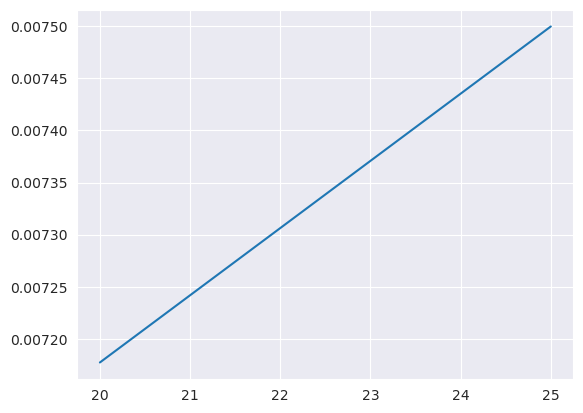

In [98]:
# plot results
import matplotlib.pyplot as plt
plt.plot([x[0] for x in results], [x[1] for x in results])

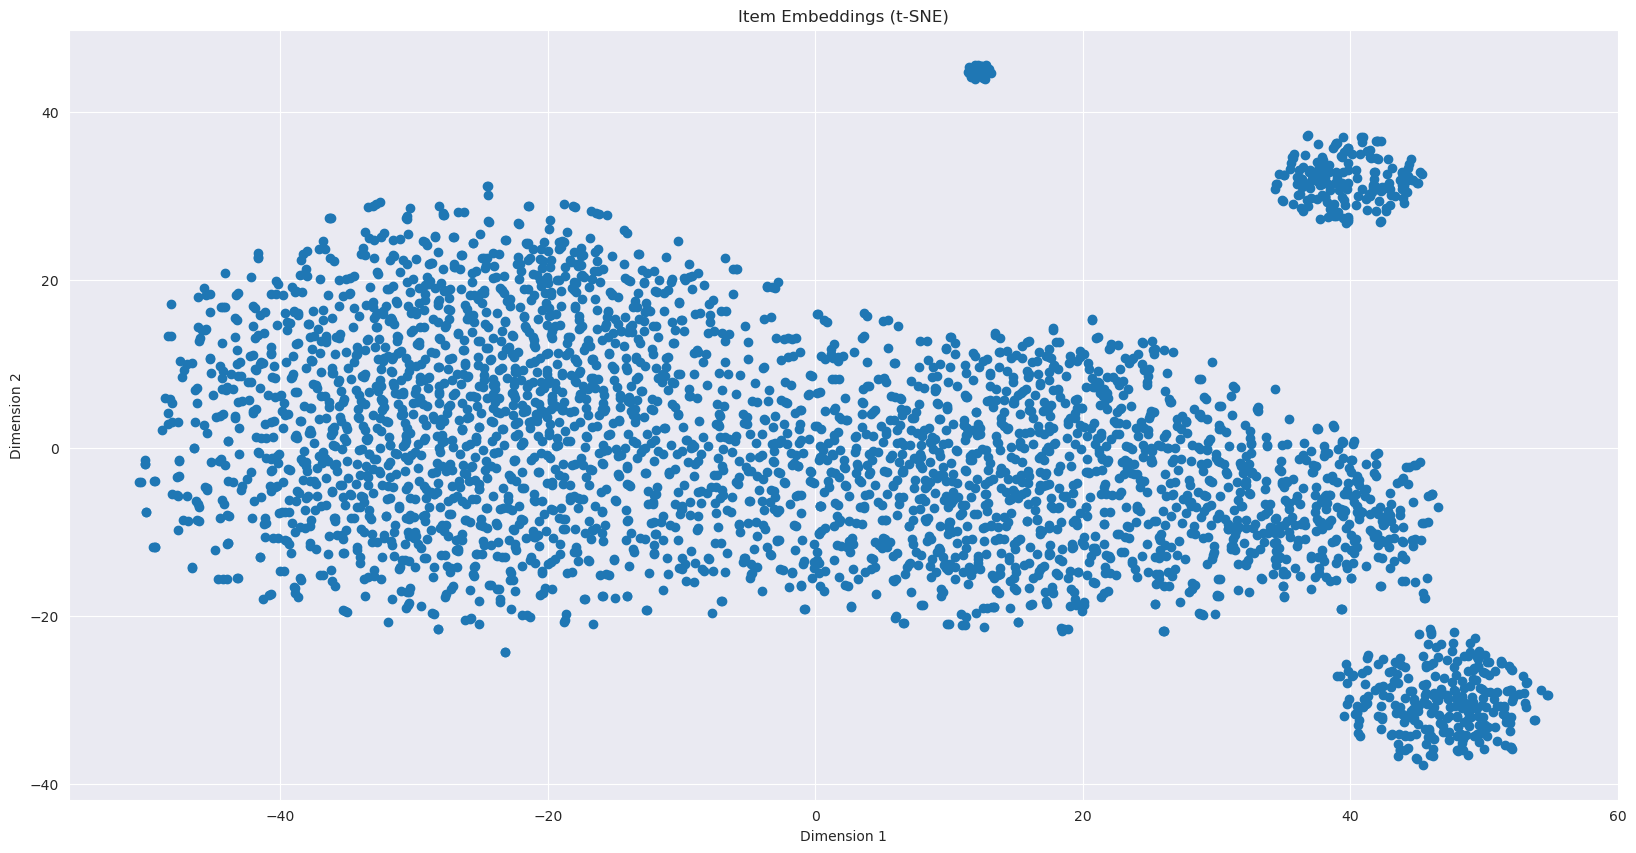

In [113]:
# Access the item and user embeddings
learn = collab_learner(dls, n_factors=50, y_range=(0,1.1))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

item_embeddings = learn.model.i_weight.weight
user_embeddings = learn.model.u_weight.weight

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE on item embeddings
tsne = TSNE(n_components=2)
item_embeddings_tsne = tsne.fit_transform(item_embeddings.detach().numpy())

# Plot the item embeddings
plt.figure(figsize=(20, 10))
plt.scatter(item_embeddings_tsne[:, 0], item_embeddings_tsne[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Item Embeddings (t-SNE)')
plt.show()

In [114]:
display(item_embeddings)

Parameter containing:
tensor([[ 2.8100e-03, -3.7238e-03,  1.7618e-03,  ..., -1.1308e-04,
          1.8798e-03,  8.6739e-03],
        [-7.4780e-02,  1.0263e-01, -8.6957e-02,  ...,  1.0196e-01,
          9.3142e-02, -1.0713e-01],
        [-3.0913e-02,  1.0629e-01, -1.0857e-01,  ...,  9.9718e-02,
          2.7722e-02, -1.0836e-01],
        ...,
        [-7.9098e-02,  9.0613e-02, -1.0261e-01,  ...,  8.9095e-02,
          3.8244e-02, -1.0196e-01],
        [ 2.7658e-02,  1.4565e-01, -1.5346e-01,  ...,  1.0980e-01,
          3.6491e-02, -1.5456e-01],
        [-5.0832e-02,  8.6853e-02, -1.4366e-01,  ...,  1.2881e-01,
          2.3487e-02, -1.5348e-01]], requires_grad=True)